<a href="https://colab.research.google.com/github/Jashwanthik-2801/SpeechEmotionRecognition/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os
import matplotlib.pyplot as plt
import librosa.display
import librosa
import IPython.display as ipd  
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.layers import Dense, Embedding


In [3]:
path = "/content/drive/MyDrive/SpeechEmotion/"
Emotions={1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}

In [4]:
folder_names=os.listdir(path)
#print(folder_names)
folder_names.sort()

emotions=[]
gender=[]
intensity=[]
paths=[]

for i in folder_names:
    file_names=os.listdir(path + i)
    
    for file in file_names:
        parts=file.split('.')[0].split('-')
        emotions.append(int(parts[2]))
        intensity.append(int(parts[3]))
        if int(parts[6])%2==0:
            gender.append('female')
        else:
            gender.append('male')
        paths.append(path+i+'/'+file) 

In [5]:
ravdess=pd.DataFrame({
    'path':paths,
    'emotion':emotions
})
ravdess['emotion']=ravdess['emotion'].map(Emotions)
print('Shape=>',ravdess.shape)
ravdess

Shape=> (1440, 2)


,path,emotion
0,/content/drive/MyDrive/SpeechEmotion/Actor_01/...,neutral
1,/content/drive/MyDrive/SpeechEmotion/Actor_01/...,neutral
2,/content/drive/MyDrive/SpeechEmotion/Actor_01/...,neutral
3,/content/drive/MyDrive/SpeechEmotion/Actor_01/...,calm
4,/content/drive/MyDrive/SpeechEmotion/Actor_01/...,neutral
...,...,...
1435,/content/drive/MyDrive/SpeechEmotion/Actor_24/...,disgust
1436,/content/drive/MyDrive/SpeechEmotion/Actor_24/...,surprise
1437,/content/drive/MyDrive/SpeechEmotion/Actor_24/...,surprise
1438,/content/drive/MyDrive/SpeechEmotion/Actor_24/...,surprise


In [6]:
Tess = "/content/drive/MyDrive/Tess/tess/"

In [7]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

emotion_df = pd.DataFrame(file_emotion, columns=['emotion'])
path_df = pd.DataFrame(file_path, columns=['path'])
Tess_df = pd.concat([path_df,emotion_df], axis=1)
Tess_df.head()
        

,path,emotion
0,/content/drive/MyDrive/Tess/tess/OAF_Pleasant_...,surprise
1,/content/drive/MyDrive/Tess/tess/OAF_Pleasant_...,surprise
2,/content/drive/MyDrive/Tess/tess/OAF_Pleasant_...,surprise
3,/content/drive/MyDrive/Tess/tess/OAF_Pleasant_...,surprise
4,/content/drive/MyDrive/Tess/tess/OAF_Pleasant_...,surprise


In [8]:
df = (pd.concat([ravdess,Tess_df],axis = 0))
df.reset_index(drop=True,inplace=True)
df

,path,emotion
0,/content/drive/MyDrive/SpeechEmotion/Actor_01/...,neutral
1,/content/drive/MyDrive/SpeechEmotion/Actor_01/...,neutral
2,/content/drive/MyDrive/SpeechEmotion/Actor_01/...,neutral
3,/content/drive/MyDrive/SpeechEmotion/Actor_01/...,calm
4,/content/drive/MyDrive/SpeechEmotion/Actor_01/...,neutral
...,...,...
4235,/content/drive/MyDrive/Tess/tess/OAF_angry/OAF...,angry
4236,/content/drive/MyDrive/Tess/tess/OAF_angry/OAF...,angry
4237,/content/drive/MyDrive/Tess/tess/OAF_angry/OAF...,angry
4238,/content/drive/MyDrive/Tess/tess/OAF_angry/OAF...,angry


In [9]:
print(df['emotion'].value_counts())


fear        592
sad         592
happy       592
surprise    592
disgust     592
angry       592
neutral     496
calm        192
Name: emotion, dtype: int64


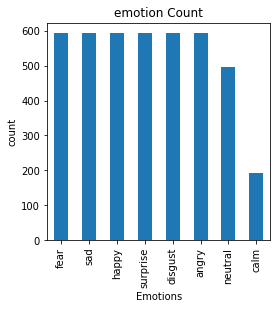

In [10]:
ax = df['emotion'].value_counts().plot(kind='bar',figsize=(4,4),title="emotion Count")
ax.set_xlabel("Emotions")
ax.set_ylabel("count")
plt.show()

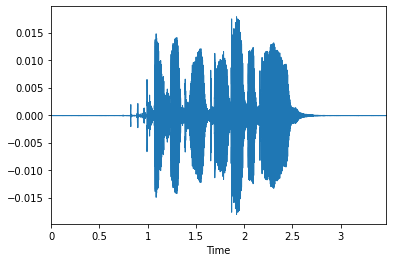

In [11]:
fig = plt.figure(figsize=(6,4))
signal,sr=librosa.load("/content/drive/MyDrive/SpeechEmotion/Actor_18/03-01-01-01-01-01-18.wav",sr=22050)
librosa.display.waveplot(signal,sr=22050)


In [12]:
audio_signals=[]
for i in Emotions.values():
    audio_signals.append(df[df['emotion']==i]['path'].reset_index(drop=True)[0])
audio_signals

['/content/drive/MyDrive/SpeechEmotion/Actor_01/03-01-01-01-01-01-01.wav',
 '/content/drive/MyDrive/SpeechEmotion/Actor_01/03-01-02-01-02-01-01.wav',
 '/content/drive/MyDrive/SpeechEmotion/Actor_01/03-01-03-01-01-01-01.wav',
 '/content/drive/MyDrive/SpeechEmotion/Actor_01/03-01-04-02-01-01-01.wav',
 '/content/drive/MyDrive/SpeechEmotion/Actor_01/03-01-05-01-01-01-01.wav',
 '/content/drive/MyDrive/SpeechEmotion/Actor_01/03-01-06-01-02-02-01.wav',
 '/content/drive/MyDrive/SpeechEmotion/Actor_01/03-01-07-01-01-01-01.wav',
 '/content/drive/MyDrive/SpeechEmotion/Actor_01/03-01-08-01-01-02-01.wav']

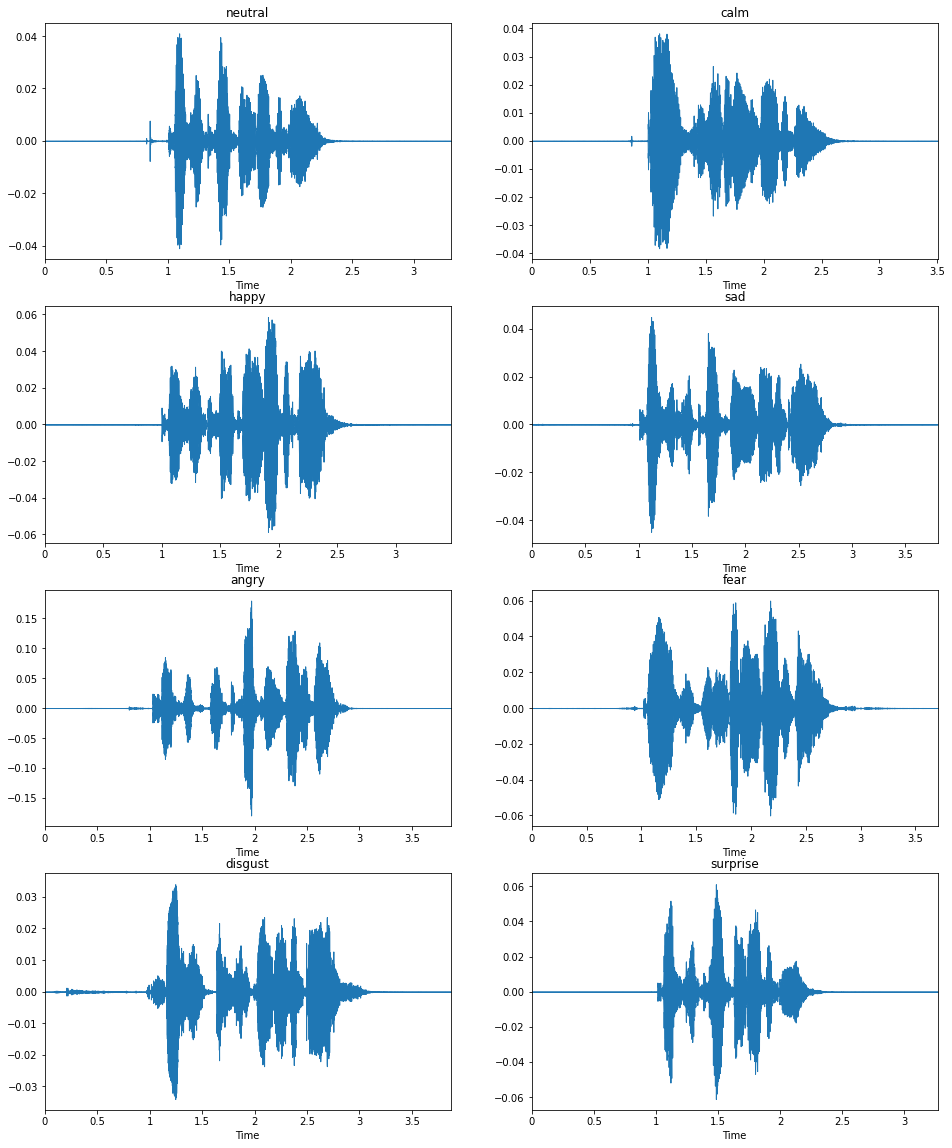

In [13]:
fig,axes=plt.subplots(4,2,figsize=(16,20))

for ax,emotion,path in zip(axes.flatten(),Emotions.values(),audio_signals):
    signal,sr=librosa.load(path,sr=22050)
    librosa.display.waveplot(signal,sr=22050,ax=ax)
    ax.set(title=emotion)

In [14]:
s,sr = librosa.load("/content/drive/MyDrive/SpeechEmotion/Actor_01/03-01-01-01-01-01-01.wav",sr = 22050)
ipd.display(ipd.Audio(s,rate=22050))

#voice of actor 2 (female)
s,sr = librosa.load("/content/drive/MyDrive/SpeechEmotion/Actor_02/03-01-01-01-01-01-02.wav",sr = 22050)
ipd.display(ipd.Audio(s,rate=22050))

# check if you dont use sampling rate then we get the streteched voice
# and also sr in librosa.load should be equal to the rate in ipd.display

k,sr = librosa.load("/content/drive/MyDrive/SpeechEmotion/Actor_02/03-01-01-01-01-01-02.wav",sr = None)
ipd.display(ipd.Audio(k,rate = 10000))

In [15]:
for emotion,path in zip(Emotions.values(),audio_signals):
    signal,sr=librosa.load(path,sr=3000)
    print("Emotion : " + emotion)
    ipd.display(ipd.Audio(signal,rate=3000))

Emotion : neutral


Emotion : calm


Emotion : happy


Emotion : sad


Emotion : angry


Emotion : fear


Emotion : disgust


Emotion : surprise


**Feature Extraction**

In [16]:
x,sr = librosa.load("/content/drive/MyDrive/SpeechEmotion/Actor_01/03-01-01-01-01-01-01.wav",sr = 22050)
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

(20, 143)


In [17]:
df1 = pd.DataFrame(columns=['feature'])
df1

,feature


In [ ]:
bookmark=0

for index,y in tqdm(df.iterrows()):
        X, sample_rate = librosa.load(y['path'],res_type='kaiser_fast',sr=22050*2)
        sample_rate = np.array(sample_rate)
        result = np.array([])
        stft = np.abs(librosa.stft(X))

        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13).T,axis=0)
        result = np.hstack((result,mfccs))

        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result = np.hstack((result,chroma))

        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result = np.hstack((result,mel))

        feature = result
        #df.loc[df.index == index,'new_col'] = pd.Series(feature)
        df1.loc[bookmark] = [feature]
        #print(len(feature))
        bookmark=bookmark+1

2633it [17:41,  2.34it/s]

In [ ]:
df1.head()

In [ ]:
df2 = pd.DataFrame(df1['feature'].values.tolist())
df2.head()

In [ ]:
newdf = pd.concat([df,df2],axis=1)
newdf.head()

In [ ]:
newdf[newdf.isna().any(axis=1)]

In [ ]:
newdf.isnull().values.any()

In [ ]:
newdf=newdf.fillna(0)

In [ ]:
newdf.isnull().values.any()

In [ ]:
X = newdf.iloc[:, 2:154]
X

In [ ]:
Y = newdf.iloc[:,[1]]
Y

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

lb = LabelEncoder()

Y_train = np_utils.to_categorical(lb.fit_transform(Y_train))
Y_test = np_utils.to_categorical(lb.fit_transform(Y_test))

In [ ]:
Y_train.shape

In [ ]:
Y_test.shape

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier(alpha = 0.01,batch_size=256,epsilon=1e-08,hidden_layer_sizes=(300,),learning_rate='adaptive',max_iter=500)

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = model.predict(X_test)
print(accuracy_score(y_true=Y_test,y_pred=y_pred)*100)

In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
import tensorflow.keras

**Model Creation**

In [ ]:
model = Sequential()

model.add(Conv1D(216, 5,padding='same',input_shape=(152,1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = tensorflow.keras.optimizers.RMSprop(learning_rate = 0.00001, decay=1e-6)

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [ ]:
mod = model.fit(X_train, Y_train, batch_size=32,epochs = 250, validation_data=(X_test, Y_test))

In [ ]:
model.history

In [ ]:
plt.plot(mod.history['loss'])
plt.plot(mod.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, Y_test, verbose=0)

In [ ]:
model_name = 'Speech_Emotion_Recognition_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

In [ ]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("saved_models/Speech_Emotion_Recognition_Model.h5")
print("Loaded model from disk")

loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [ ]:
data, sampling_rate = librosa.load('/content/drive/MyDrive/welcome5.wav')

In [ ]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=22050)

In [ ]:
X, sample_rate = librosa.load('/content/drive/MyDrive/welcome5.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
result = np.array([])
stft = np.abs(librosa.stft(X))

mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13).T,axis=0)
result = np.hstack((result,mfccs))

chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
result = np.hstack((result,chroma))

mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
result = np.hstack((result,mel))
featurelive  = result

livedf2 = featurelive

In [ ]:
livedf2= pd.DataFrame(data=livedf2)
livedf2 = livedf2.stack().to_frame().T

livedf2

In [ ]:
dim= np.expand_dims(livedf2, axis=2)
livepreds = model.predict(dim,batch_size=32,verbose=1)
livepreds

In [ ]:
livepreds1=livepreds.argmax(axis=1)
liveabc = livepreds1.astype(int).flatten()
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions